In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.applications import Xception

In [4]:
xception_conv = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in xception_conv.layers:
    layer.trainable = True

for layer in xception_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(xception_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.summary()

83697664/83683744 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fa265727d50> True
<keras.layers.convolutional.Conv2D object at 0x7fa250596c90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa2645024d0> True
<keras.layers.core.activation.Activation object at 0x7fa250564490> True
<keras.layers.convolutional.Conv2D object at 0x7fa25054cbd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa2504b60d0> True
<keras.layers.core.activation.Activation object at 0x7fa2504c3710> True
<keras.layers.convolutional.SeparableConv2D object at 0x7fa2504cb1d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa2504650d0> True
<keras.layers.core.activation.Activation object at 0x7fa2504c3790> True
<keras.layers.convolutional.SeparableConv2D object at 0x7fa250460510> True
<keras.layers.normalization.batch_normalization.BatchNormalization object a

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

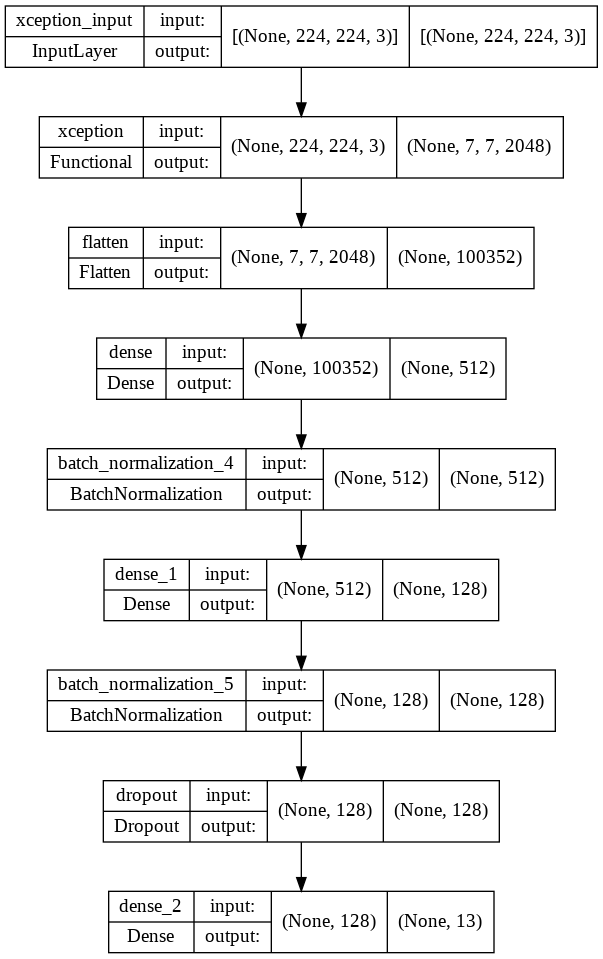

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [7]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [10]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [11]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [12]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
331/331 [==============================] - 4389s 13s/step - loss: 1.2558 - accuracy: 0.6455 - val_loss: 0.7697 - val_accuracy: 0.7997
Epoch 2/10
331/331 [==============================] - 202s 609ms/step - loss: 0.5808 - accuracy: 0.8320 - val_loss: 0.5759 - val_accuracy: 0.8457
Epoch 3/10
331/331 [==============================] - 202s 610ms/step - loss: 0.3978 - accuracy: 0.8873 - val_loss: 0.4628 - val_accuracy: 0.8672
Epoch 4/10
331/331 [==============================] - 202s 610ms/step - loss: 0.2886 - accuracy: 0.9139 - val_loss: 0.5115 - val_accuracy: 0.8741
Epoch 5/10
331/331 [==============================] - 202s 610ms/step - loss: 0.2209 - accuracy: 0.9357 - val_loss: 0.4342 - val_accuracy: 0.8718
Epoch 6/10
331/331 [==============================] - 202s 609ms/step - loss: 0.1712 - accuracy: 0.9508 - val_loss: 0.4570 - val_accuracy: 0.8833
Epoch 7/10
331/331 [==============================] - 202s 609ms/step - loss: 0.1319 - accuracy: 0.9620 - val_loss: 0.4545 - 

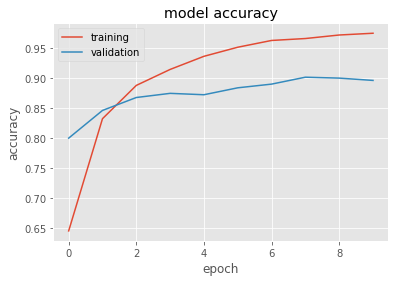

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

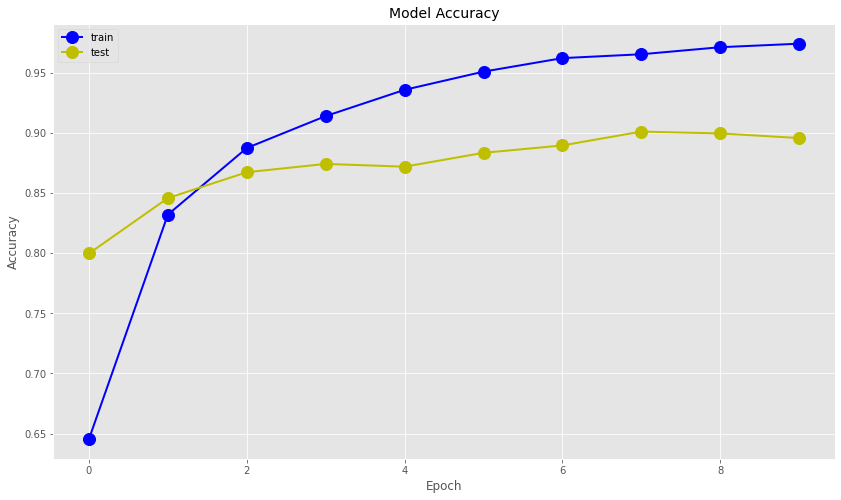

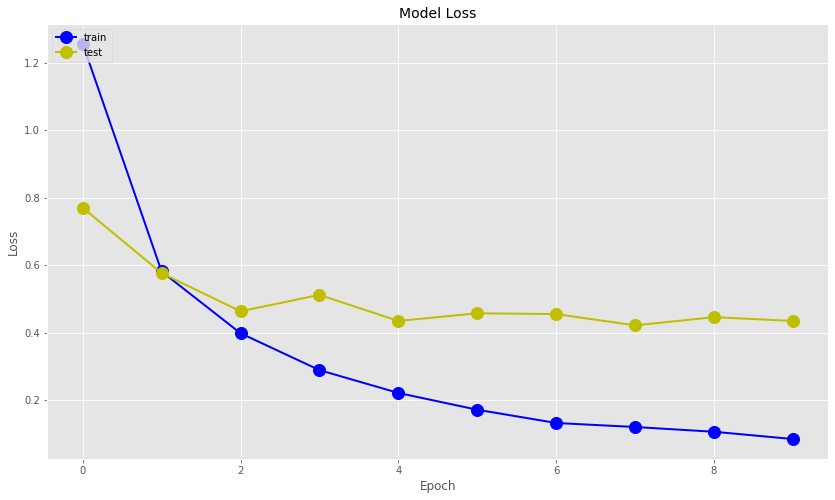

In [14]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 8s 184ms/step - loss: 0.4342 - accuracy: 0.8956
n Test_Accuracy:- 0.8956254720687866
confusion matrix
[[ 70   0   2   1   0   0   1   0   1   3   2   0   0]
 [  1  40   0   0   0   3   3   0   1   6   0   0   0]
 [  2   2 266   0   4   0   0   1   0   0   0   1   1]
 [  0   0   0 171   0   0   0   3   1   7   0   1   0]
 [  0   0   4   3 140   0   0   0   0   1   0   0   0]
 [  1   3   0   0   0  55   1   0   0   1   1   0   0]
 [  0   7   3   7   0   1  54   0   0   4   3   0   1]
 [  0   0   1   0   1   0   0  38   0   0   0   0   0]
 [  2   1   0   3   0   0   0   0  38   3   0   1   0]
 [  0   0   4   1   0   0   0   0   1  65   0   0   0]
 [  0   0   0   2   0   0   7   0   0   2  40   0   7]
 [  0   1   0   0   0   1   0   0   1   0   0 135   0]
 [  0   1   0   1   0   1   1   0   2   3   0   0  55]]


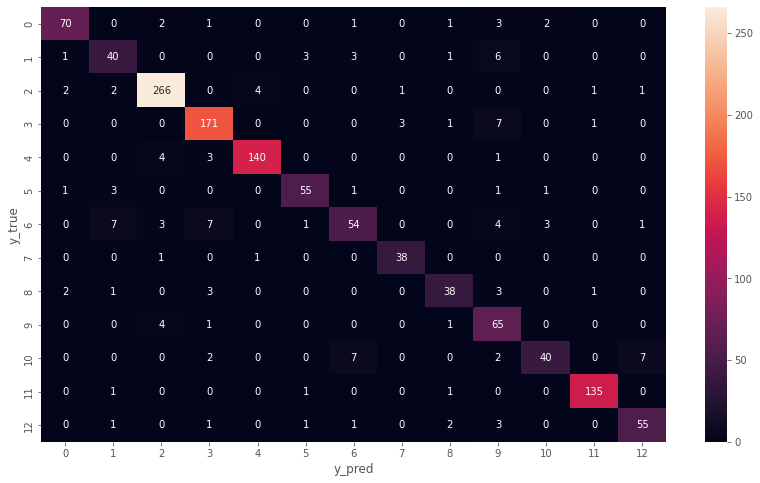

In [16]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [17]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.92      0.88      0.90        80
     10Pachy       0.73      0.74      0.73        54
     12Phyll       0.95      0.96      0.96       277
     14Macro       0.90      0.93      0.92       183
      1Pnoep       0.97      0.95      0.96       148
      2Malac       0.90      0.89      0.89        62
      3Malac       0.81      0.68      0.73        80
      4Anthi       0.90      0.95      0.93        40
      5Anthr       0.84      0.79      0.82        48
      6Corvu       0.68      0.92      0.78        71
      7Dryoc       0.87      0.69      0.77        58
      8Elanu       0.98      0.98      0.98       138
      9Ortho       0.86      0.86      0.86        64

    accuracy                           0.90      1303
   macro avg       0.87      0.86      0.86      1303
weighted avg       0.90      0.90      0.90      1303



In [18]:
model.save('/content/drive/MyDrive/Birddata_split/xception_adam_1.hdf5')

In [19]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/xception_adam_1.csv',index=False)

In [20]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9264911466811352


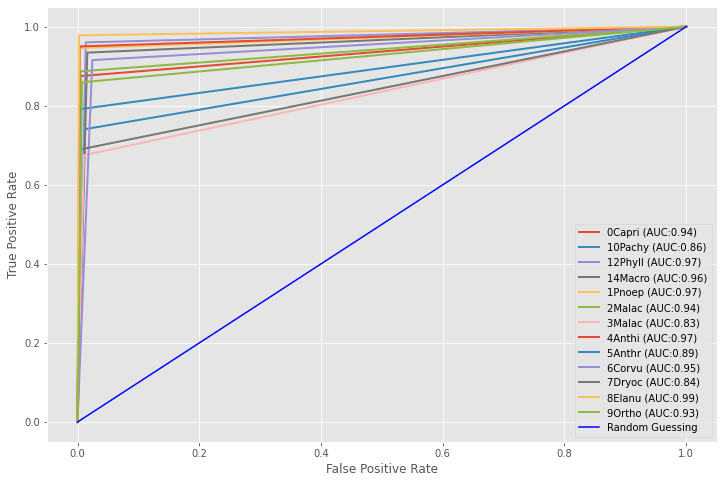

In [21]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [22]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.977743668457406

In [23]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1274

In [24]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8956254796623178

In [25]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1167